In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df=pd.read_csv("data_final.csv")
df.head()

,categoryId,channel_subscriberCount,definition,likeCount,dislikeCount,viewCount,commentCount,viewCount/channel_month_old,viewCount/video_month_old,viewCount/http_in_descp,viewCount/NoOfTags,viewCount/tags_in_desc,social_links,subscriberCount/videoCount,channelViewCount/channeVideoCount,channelViewCount/socialLink
0,0,12457,0,780.0,25.0,370016,249.0,6491.508772,6981,185008,12333,6981,5,136,162634,2466625
1,0,183151,0,148.0,5.0,46535,17.0,750.564516,1789,7756,1551,1861,9,56,113038,36873164
2,0,726214,0,11804.0,263.0,2575951,971.0,50508.843137,214662,2575952,643988,515190,5,99,144577,175011510
3,0,4181230,0,85.0,4.0,43341,2.0,335.976744,1238,2281,3940,14447,9,170,219707,538394366
4,0,9,0,26.0,4.0,3280,2.0,182.222222,410,3281,468,468,0,0,175,16133


In [7]:
df.columns

Index(['categoryId', 'channel_subscriberCount', 'definition', 'likeCount',
       'dislikeCount', 'viewCount', 'commentCount',
       'viewCount/channel_month_old', 'viewCount/video_month_old',
       'viewCount/http_in_descp', 'viewCount/NoOfTags',
       'viewCount/tags_in_desc', 'social_links', 'subscriberCount/videoCount',
       'channelViewCount/channeVideoCount', 'channelViewCount/socialLink'],
      dtype='object')

In [8]:
features=['channel_subscriberCount', 'dislikeCount', 'commentCount', 'viewCount/channel_month_old',
          'viewCount/video_month_old', 'viewCount/http_in_descp', 'viewCount/NoOfTags', 
          'viewCount/tags_in_desc', 'social_links', 'subscriberCount/videoCount',
          'channelViewCount/channeVideoCount', 'channelViewCount/socialLink']

target=['likeCount']

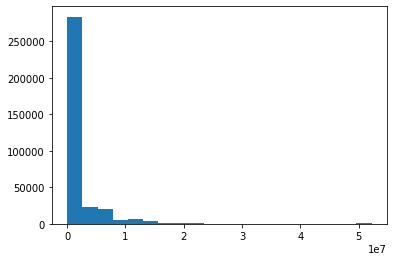

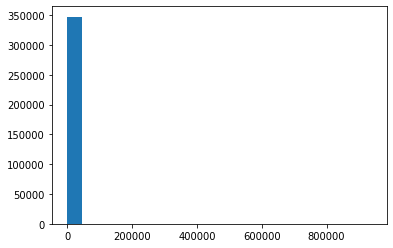

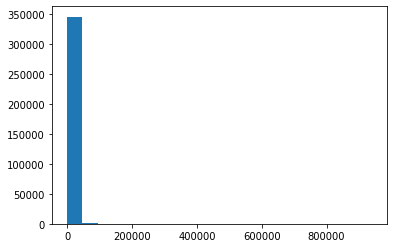

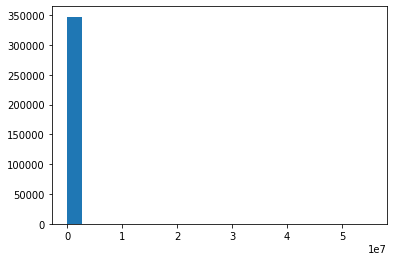

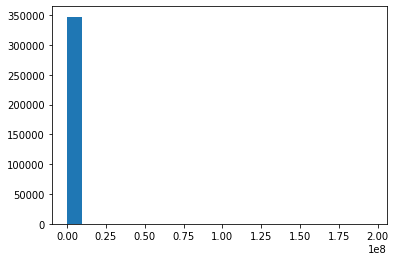

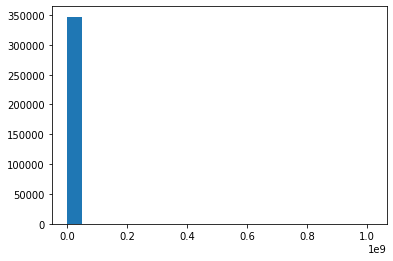

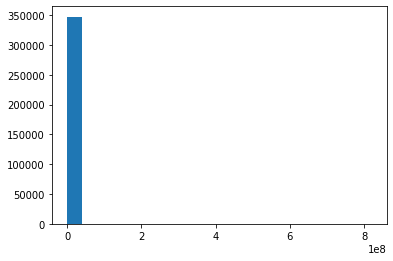

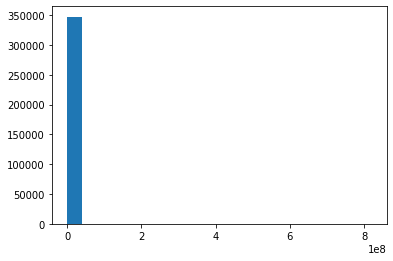

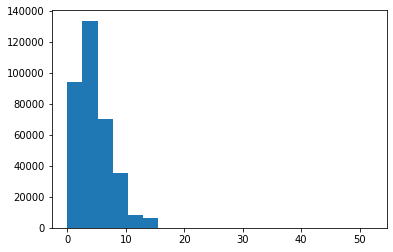

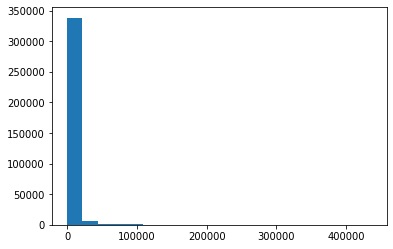

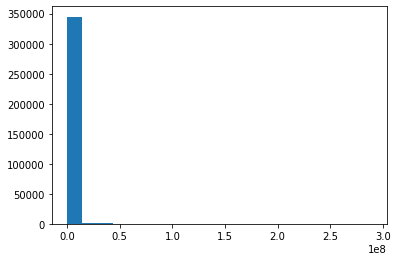

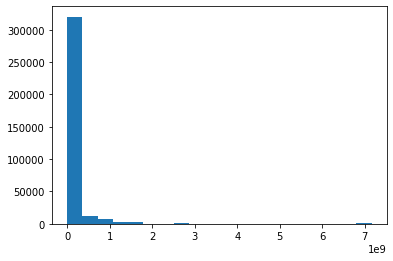

In [9]:
for i in features: 
  n_bins=20
  plt.hist(x=df[i],bins=n_bins)
  plt.show()

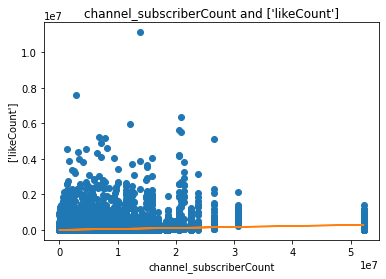

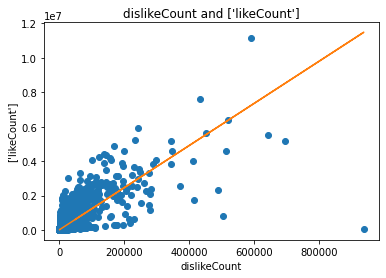

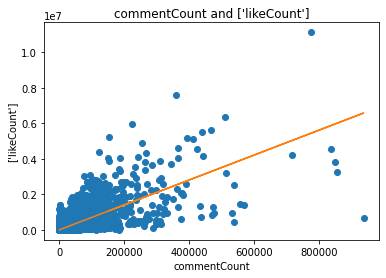

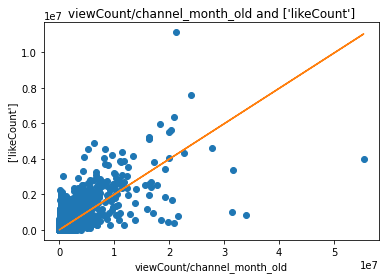

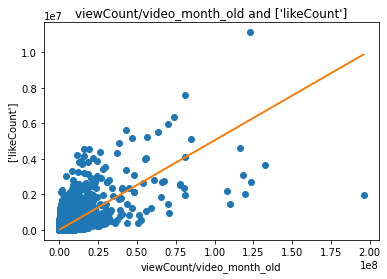

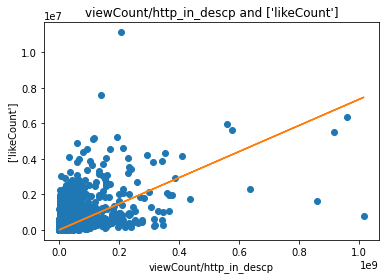

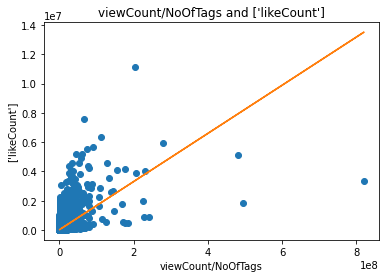

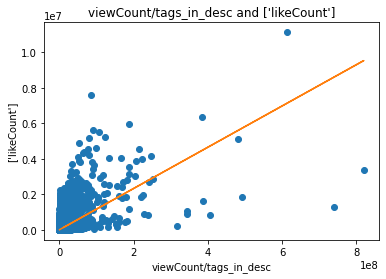

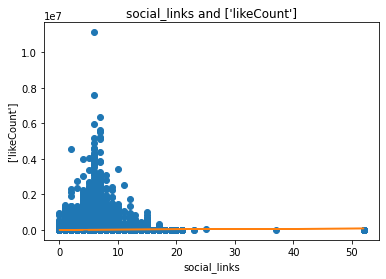

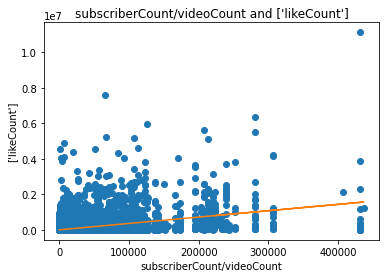

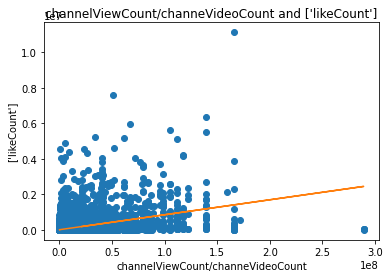

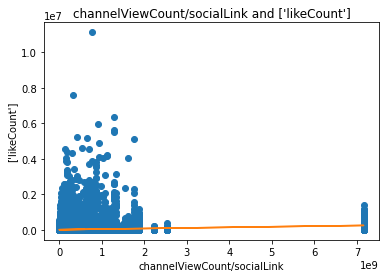

In [15]:
for i in features: 
  x=df[i]
  y=df[target]
  m, c = np.polyfit(x, y, 1)
  plt.plot(x, y, 'o')
  plt.plot(x, m*x + c)
  plt.xlabel(i)
  plt.ylabel(target)
  plt.title(f'{i} and {target}')
  plt.show()

In [16]:
X = df[features]
y = df[target].values.reshape(-1,1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


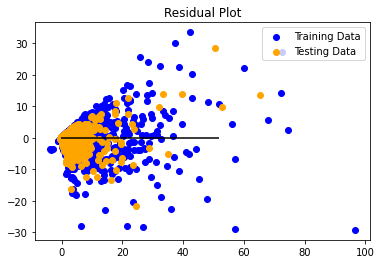

In [21]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
MSE_linear_regression = mean_squared_error(y_test_scaled, predictions)
r2_linear_regression = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION
print(f"MSE: {MSE_linear_regression}, R2: {r2_linear_regression}")

MSE: 0.15424129761019686, R2: 0.7884049161501874


In [23]:
from sklearn.linear_model import Lasso
### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = lasso.predict(X_test_scaled)
MSE_lasso = mean_squared_error(y_test_scaled, predictions)
r2_lasso = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION
print(f"MSE: {MSE_lasso}, R2: {r2_lasso}")

MSE: 0.15596987358768177, R2: 0.786033578612422


In [24]:
from sklearn.linear_model import Ridge
### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = ridge.predict(X_test_scaled)
MSE_ridge = mean_squared_error(y_test_scaled, predictions)
r2_ridge = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION
print(f"MSE: {MSE_ridge}, R2: {r2_ridge}")

MSE: 0.1542412958381883, R2: 0.7884049185811076


In [25]:
from sklearn.linear_model import ElasticNet
### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = elasticnet.predict(X_test_scaled)
MSE_elastic = mean_squared_error(y_test_scaled, predictions)
r2_elastic = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION
print(f"MSE: {MSE_elastic}, R2: {r2_elastic}")

MSE: 0.1546542785301024, R2: 0.787838370525055


In [27]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [32]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

regressor.fit(X_train_scaled, y_train_scaled)

[00:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [33]:
y_pred = regressor.predict(X_test_scaled)

In [34]:
mean_squared_error(y_test, y_pred)

5991148950.68735

In [37]:
from sklearn.metrics import r2_score

In [38]:
score = r2_score(y_test_scaled, y_pred)
score

0.8742131124818475

We know from these graphs, using XGBoost that the features we used accounted for 87% accuracy of the target (likeCount)